**Problem statement:

The aim of the project is to predict fraudulent credit card transactions using classification models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset contains transactions made over a period of two days in September 2013 by European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms.

**Steps:

The steps are broadly divided into below steps:

1.Reading and understanding the data
2.Handling missing values 
3.Outliers treatment
4.Checking the distribution of the classes
    a.Observe the distribution of classes with time
    b.Observe the distribution of classes with amount
    c.Statistical view amount data
5.Handling imbalanced data using Under-Sampling
6.Preparing the data for modelling
    a.Splitting the data into Feature and Target
    b.Splitting data into Training data and Testing data
7.Building and Evaluate each models
8.Compare between models F1 scores and Accuracies
9.Plot to know importance of each Feature

In [1]:
# IMPORTING PACKAGES
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import itertools # advanced tools

%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

**Reading and understanding the data

In [2]:
#importing data
df = pd.read_csv('creditcardfraud.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Handling missing values in columns

In [6]:
#Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


**Analysis:**
We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

**Outliers treatment

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed,
which assumed that the outlier values are taken care while transforming the data.

**Checking the distribution of the classes

In Class
0 ---> Normal Transaction
1 ---> Fradulent Transaction

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Analysis:**
Data is imbalanced

In [8]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 3)
nonfraud_percentage = 100-fraud_percentage

print('CASE COUNT')
print('--------------------------------------------')
print('Total number of cases are {}'.format(cases))
print()
print('Number of Non-fraud cases are {}'.format(nonfraud_count))
print('Percentage of Non-fraud cases is {}%'.format(nonfraud_percentage))
print()
print('Number of fraud cases are {}'.format(fraud_count))
print('Percentage of fraud cases is {}%'.format(fraud_percentage))
print('--------------------------------------------')

CASE COUNT
--------------------------------------------
Total number of cases are 284807

Number of Non-fraud cases are 284315
Percentage of Non-fraud cases is 99.827%

Number of fraud cases are 492
Percentage of fraud cases is 0.173%
--------------------------------------------


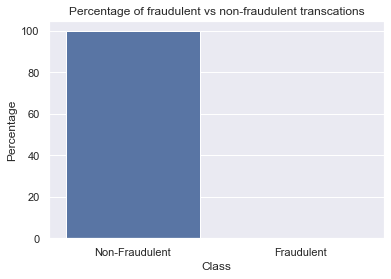

In [9]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[nonfraud_percentage, fraud_percentage]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

In [10]:
#separting data for analysis
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

In [11]:
print(nonfraud_cases.shape)
print(fraud_cases.shape)

(284315, 31)
(492, 31)


**Observe the distribution of classes with time

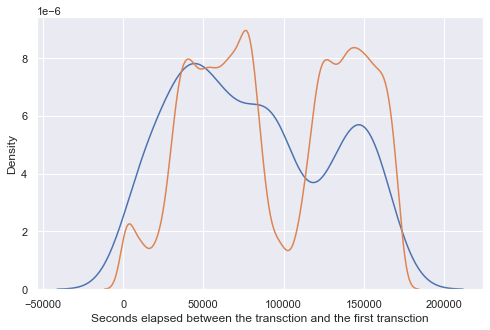

In [12]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud_cases['Time'],label='fraudulent',hist=False)
ax = sns.distplot(nonfraud_cases['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

**Analysis:**
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [13]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

In [14]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Observe the distribution of classes with amount

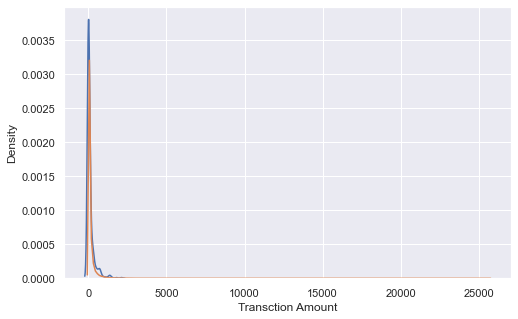

In [15]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud_cases['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(nonfraud_cases['Amount'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

Blue - Fraud cases
Orange - NonFraud cases

**Analysis:**
We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

**Statistical view amount data

In [16]:
# statistical view of both fraud and non-fraud transaction amount data 
nonfraud_cases.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
fraud_cases.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

**Analysis:**
Seeing the statistics and comparing it with Fraud and Non-fraud transaction, the values in the ‘Amount’ variable are varying enormously when compared to the rest of the variables

**Handling imbalanced data using Under-Sampling

Undersampling — Deleting samples from the majority class.
Build a sample dataset containing similar distribution of Fraud and Non-Fraud Transaction

Number of Fraud Transaction --->492

In [18]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [19]:
#random sampling for non-fraud cases
nonfraud_sample = nonfraud_cases.sample(492)
nonfraud_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
172903,121289.0,1.925714,-0.014820,-1.945133,0.976264,1.273994,0.873284,0.235924,0.216289,0.114380,...,0.120087,0.615778,0.002280,-1.650688,0.285518,-0.376703,0.022899,-0.092023,1.00,0
216821,140646.0,-0.946051,1.197833,1.807528,-0.374032,-0.307423,-0.391533,0.258559,0.376668,-0.317552,...,-0.118896,-0.345453,-0.227353,0.052494,0.375656,-0.421532,-0.038535,0.016535,5.00,0
249822,154596.0,0.026563,0.775836,0.169457,-0.772414,0.569535,-0.625619,0.874161,-0.012423,-0.207627,...,-0.235750,-0.558082,0.023625,-0.356512,-0.493569,0.142295,0.239744,0.082854,3.59,0
135715,81371.0,-0.995626,0.528987,0.445237,0.835568,-0.525971,0.543691,1.069050,0.520819,-1.072167,...,0.392708,0.597650,0.441218,-0.338254,-0.215082,-0.305664,-0.027668,0.101325,250.30,0
39822,39980.0,-1.889375,2.413828,0.912510,2.811219,-1.262497,-0.110527,-0.826664,1.399482,-1.348281,...,0.262776,0.654782,-0.049716,0.410152,-0.022336,0.340003,0.241754,0.122618,10.65,0


In [20]:
nonfraud_sample['Class'].value_counts()

0    492
Name: Class, dtype: int64

In [21]:
#concatenating two dataframes into new dataset
newdf = pd.concat([nonfraud_sample,fraud_cases],axis=0)
newdf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
172903,121289.0,1.925714,-0.014820,-1.945133,0.976264,1.273994,0.873284,0.235924,0.216289,0.114380,...,0.120087,0.615778,0.002280,-1.650688,0.285518,-0.376703,0.022899,-0.092023,1.00,0
216821,140646.0,-0.946051,1.197833,1.807528,-0.374032,-0.307423,-0.391533,0.258559,0.376668,-0.317552,...,-0.118896,-0.345453,-0.227353,0.052494,0.375656,-0.421532,-0.038535,0.016535,5.00,0
249822,154596.0,0.026563,0.775836,0.169457,-0.772414,0.569535,-0.625619,0.874161,-0.012423,-0.207627,...,-0.235750,-0.558082,0.023625,-0.356512,-0.493569,0.142295,0.239744,0.082854,3.59,0
135715,81371.0,-0.995626,0.528987,0.445237,0.835568,-0.525971,0.543691,1.069050,0.520819,-1.072167,...,0.392708,0.597650,0.441218,-0.338254,-0.215082,-0.305664,-0.027668,0.101325,250.30,0
39822,39980.0,-1.889375,2.413828,0.912510,2.811219,-1.262497,-0.110527,-0.826664,1.399482,-1.348281,...,0.262776,0.654782,-0.049716,0.410152,-0.022336,0.340003,0.241754,0.122618,10.65,0


In [22]:
newdf.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [23]:
newdf['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

**Analysis:** 
Now we have unifornly distributed datasets

In [24]:
#comparing both transaction
newdf.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98597.847561,-0.063244,0.071048,-0.075531,-0.015180,-0.048071,0.018495,-0.018529,-0.127170,-0.002254,...,-0.045331,0.060561,-0.036278,0.018749,0.063268,-0.048291,0.033407,-0.019351,-0.032844,90.149126
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Splitting the data into Feature and Target

x ---> independent variable
y ---> dependent variable (target variable)

In [25]:
#data split
x = newdf.drop(columns='Class', axis = 1)
y = newdf['Class']
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
172903  121289.0  1.925714 -0.014820 -1.945133  0.976264  1.273994  0.873284   
216821  140646.0 -0.946051  1.197833  1.807528 -0.374032 -0.307423 -0.391533   
249822  154596.0  0.026563  0.775836  0.169457 -0.772414  0.569535 -0.625619   
135715   81371.0 -0.995626  0.528987  0.445237  0.835568 -0.525971  0.543691   
39822    39980.0 -1.889375  2.413828  0.912510  2.811219 -1.262497 -0.110527   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [26]:
#y contains class labels
print(y)

172903    0
216821    0
249822    0
135715    0
39822     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


**Splitting data into Training data and Testing data

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,stratify=y, random_state = 0)

In [28]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


**Modeling

We are using 5 different types of classification models i.e Decision Tree, K-Nearest Neighbors (KNN), Logistic Regression, Support Vector Machine (SVM), Random Forest.

**Evaluation

The evaluation metrics we are going to use are the Accuracy Score Metric ,F1 Score Metric, and Confusion matrix.

**Accuracy Score** = No.of correct predictions / Total no.of predictions

**F1 score** = 2( (precision * recall) / (precision + recall) )

**Confusion matrix**: is a visualization of a classification model that shows how well the model has predicted the outcomes when compared to the original ones.

1. Decision Tree

In [29]:
#Building Decision Tree
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(x_train, y_train)
tree_yhat = tree_model.predict(x_test)

In [30]:
#Accuracy Score
tree_accuracy_score = round(accuracy_score(y_test, tree_yhat)*100,3)
print('Accuracy score of the Decision Tree model is',tree_accuracy_score)

Accuracy score of the Decision Tree model is 88.832


In [31]:
# F1 score
tree_f1_score = round(f1_score(y_test, tree_yhat)*100,3)
print('F1 score of the Decision Tree model is',tree_f1_score)

F1 score of the Decision Tree model is 88.172


In [32]:
# defining the plot function
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'black' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

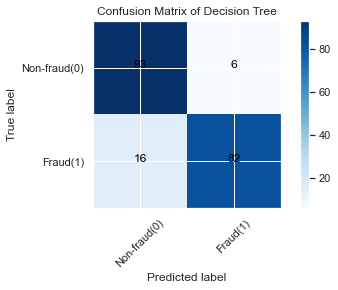

In [33]:
#confusion matrix
tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1])
tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

2. K-Nearest Neighbors model (KNN)

In [34]:
#Building K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(x_train, y_train)
knn_yhat = knn.predict(x_test)

In [35]:
#Accuracy Score
knn_accuracy_score = round(accuracy_score(y_test, knn_yhat)*100,3)
print('Accuracy score of the KNN model is ',knn_accuracy_score)

Accuracy score of the KNN model is  67.513


In [36]:
#F1 Score
knn_f1_score = round(f1_score(y_test, knn_yhat)*100,3)
print('F1 score of the KNN model is',knn_f1_score)

F1 score of the KNN model is 67.347


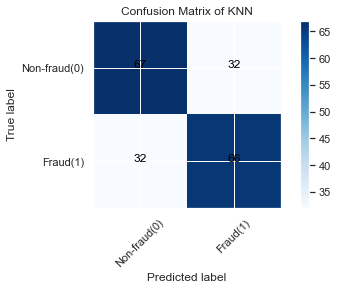

In [37]:
#confusion matrix
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1])
knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-fraud(0)','Fraud(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

3. Logistic Regression

In [38]:
#Building Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_yhat = lr.predict(x_test)

In [39]:
#Accuracy score
lr_accuracy_score = round(accuracy_score(y_test, lr_yhat)*100,3)
print('Accuracy score of the Logistic Regression model is',lr_accuracy_score)

Accuracy score of the Logistic Regression model is 92.386


In [40]:
#F1 score
lr_f1_score = round(f1_score(y_test, lr_yhat)*100,3)
print('F1 score of the Logistic Regression model is',lr_f1_score)

F1 score of the Logistic Regression model is 91.803


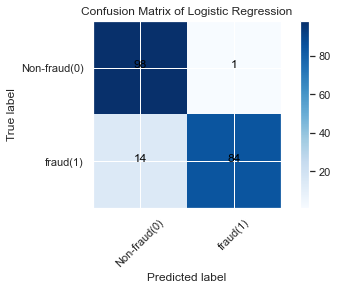

In [41]:
#Confusion matrix
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1])
lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-fraud(0)','fraud(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

4. Support Vector Machine(SVM)

In [42]:
# Building SVM 
svm = SVC()
svm.fit(x_train, y_train)
svm_yhat = svm.predict(x_test)

In [43]:
#Accuracy score
svm_accuracy_score = round(accuracy_score(y_test, svm_yhat)*100,3)
print('Accuracy score of the SVM model is',svm_accuracy_score)

Accuracy score of the SVM model is 58.376


In [44]:
#F1 score
svm_f1_score = round(f1_score(y_test, svm_yhat)*100,3)
print('F1 score of the SVM model is',svm_f1_score)

F1 score of the SVM model is 62.727


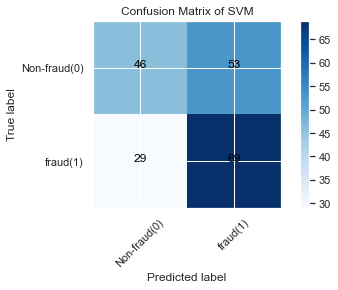

In [45]:
# Confusion matrix
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1])
svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-fraud(0)','fraud(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

5. Random Forest Tree

In [46]:
# Building Random Forest Tree
rf = RandomForestClassifier(max_depth = 4)
rf.fit(x_train, y_train)
rf_yhat = rf.predict(x_test)

In [47]:
#Accuracy score
rf_accuracy_score = round(accuracy_score(y_test, rf_yhat)*100,3)
print('Accuracy score of the Random Forest Tree model is',rf_accuracy_score)

Accuracy score of the Random Forest Tree model is 91.371


In [48]:
#F1 score
rf_f1_score = round(f1_score(y_test, rf_yhat)* 100, 3)
print('F1 score of the Random Forest Tree model is ',rf_f1_score)

F1 score of the Random Forest Tree model is  90.608


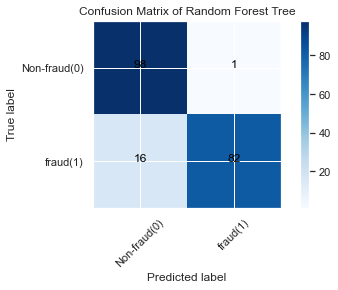

In [49]:
#Confusion matrix
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1])
rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-fraud(0)','fraud(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

**Compare between models F1 scores and Accuracies

In [50]:
models = pd.DataFrame({
    'Model': ['Decision Tree','K-Nearest Neighbors','Support Vector Machines','Logistic Regression', 'Random Forest Tree'],
    'Accuracy Score': [tree_accuracy_score,knn_accuracy_score,svm_accuracy_score,lr_accuracy_score,rf_accuracy_score],
    'F1 Score': [tree_f1_score,knn_f1_score,svm_f1_score,lr_f1_score ,rf_f1_score,]})

models.sort_values(['Accuracy Score', 'F1 Score'], ascending=[False, False])

,Model,Accuracy Score,F1 Score
3,Logistic Regression,92.386,91.803
4,Random Forest Tree,91.371,90.608
0,Decision Tree,88.832,88.172
1,K-Nearest Neighbors,67.513,67.347
2,Support Vector Machines,58.376,62.727


**Anaylsis:**
Logistic Regression is the best model 

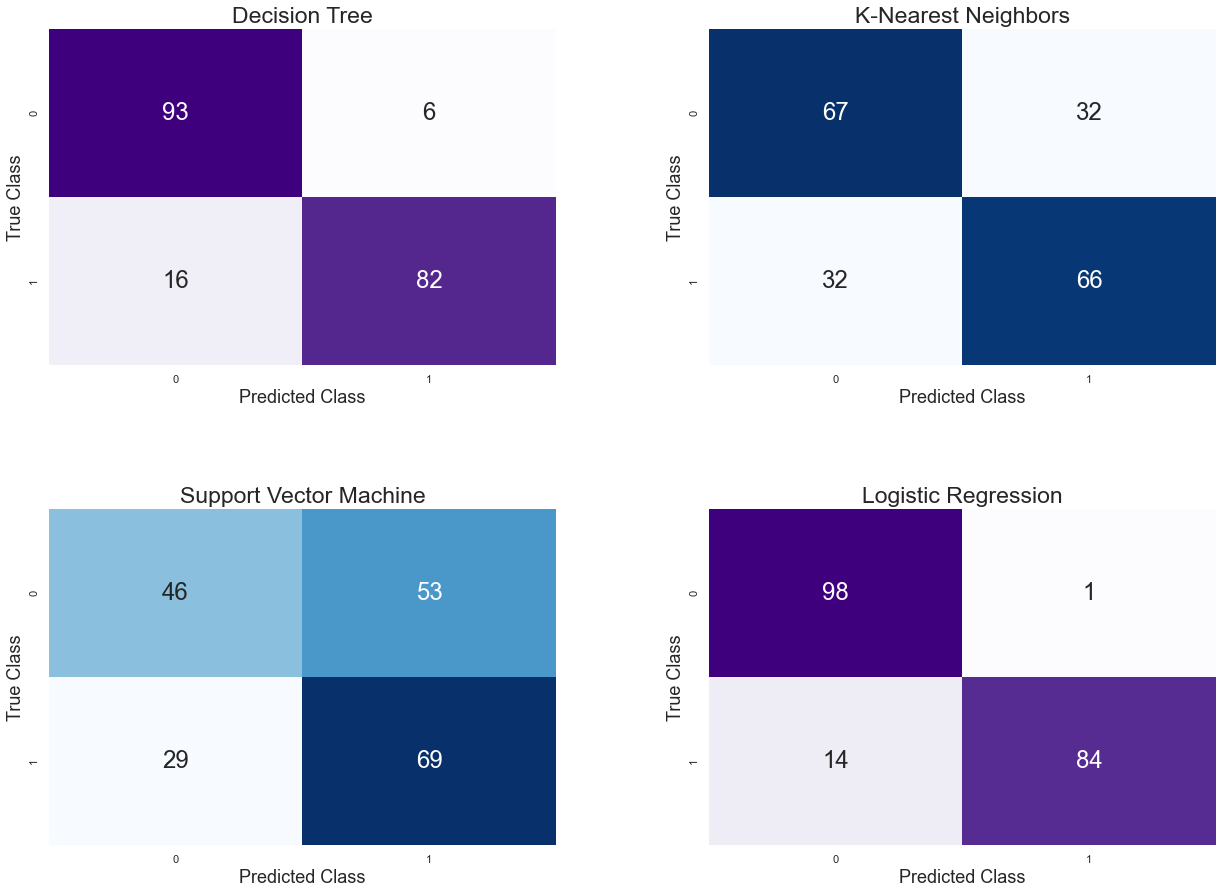

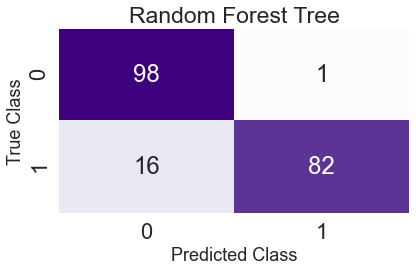

In [51]:
fig, ax = plt.subplots(2, 2,figsize=(20,15))
fig.tight_layout(pad=10.0)
sns.set(font_scale=2)

#Decision Tree
sns.heatmap(tree_matrix, ax=ax[0][0], annot=True, cbar=None, cmap="Purples", fmt = 'g')
ax[0][0].set_title("Decision Tree", fontsize=23)
ax[0][0].set_ylabel("True Class", fontsize=18), ax[0][0].set_xlabel("Predicted Class", fontsize=18)

#K-Nearest Neighbors
sns.heatmap(knn_matrix, ax=ax[0][1], annot=True, cbar=None, cmap="Blues", fmt = 'g')
ax[0][1].set_title("K-Nearest Neighbors", fontsize=23)
ax[0][1].set_ylabel("True Class", fontsize=18), ax[0][1].set_xlabel("Predicted Class", fontsize=18)

#Support Vector Machine
sns.heatmap(svm_matrix, ax=ax[1][0], annot=True, cbar=None, cmap="Blues", fmt = 'g')
ax[1][0].set_title("Support Vector Machine", fontsize=23)
ax[1][0].set_ylabel("True Class", fontsize=18), ax[1][0].set_xlabel("Predicted Class", fontsize=18)

#Logistic Regression
sns.heatmap(lr_matrix, ax=ax[1][1], annot=True, cbar=None, cmap="Purples", fmt = 'g')
ax[1][1].set_title("Logistic Regression", fontsize=23)
ax[1][1].set_ylabel("True Class", fontsize=18), ax[1][1].set_xlabel("Predicted Class", fontsize=18)

plt.show()

print()
print()
print()
print()
print()
print()
print()

#Random Forest Tree
sns.heatmap(rf_matrix, annot=True, cbar=None, cmap="Purples", fmt = 'g')
plt.title("Random Forest Tree",fontsize=23), plt.tight_layout()
plt.ylabel("True Class", fontsize=18), plt.xlabel("Predicted Class", fontsize=18)

plt.show()

**We use Random Forest Model to know the importance of each Feature

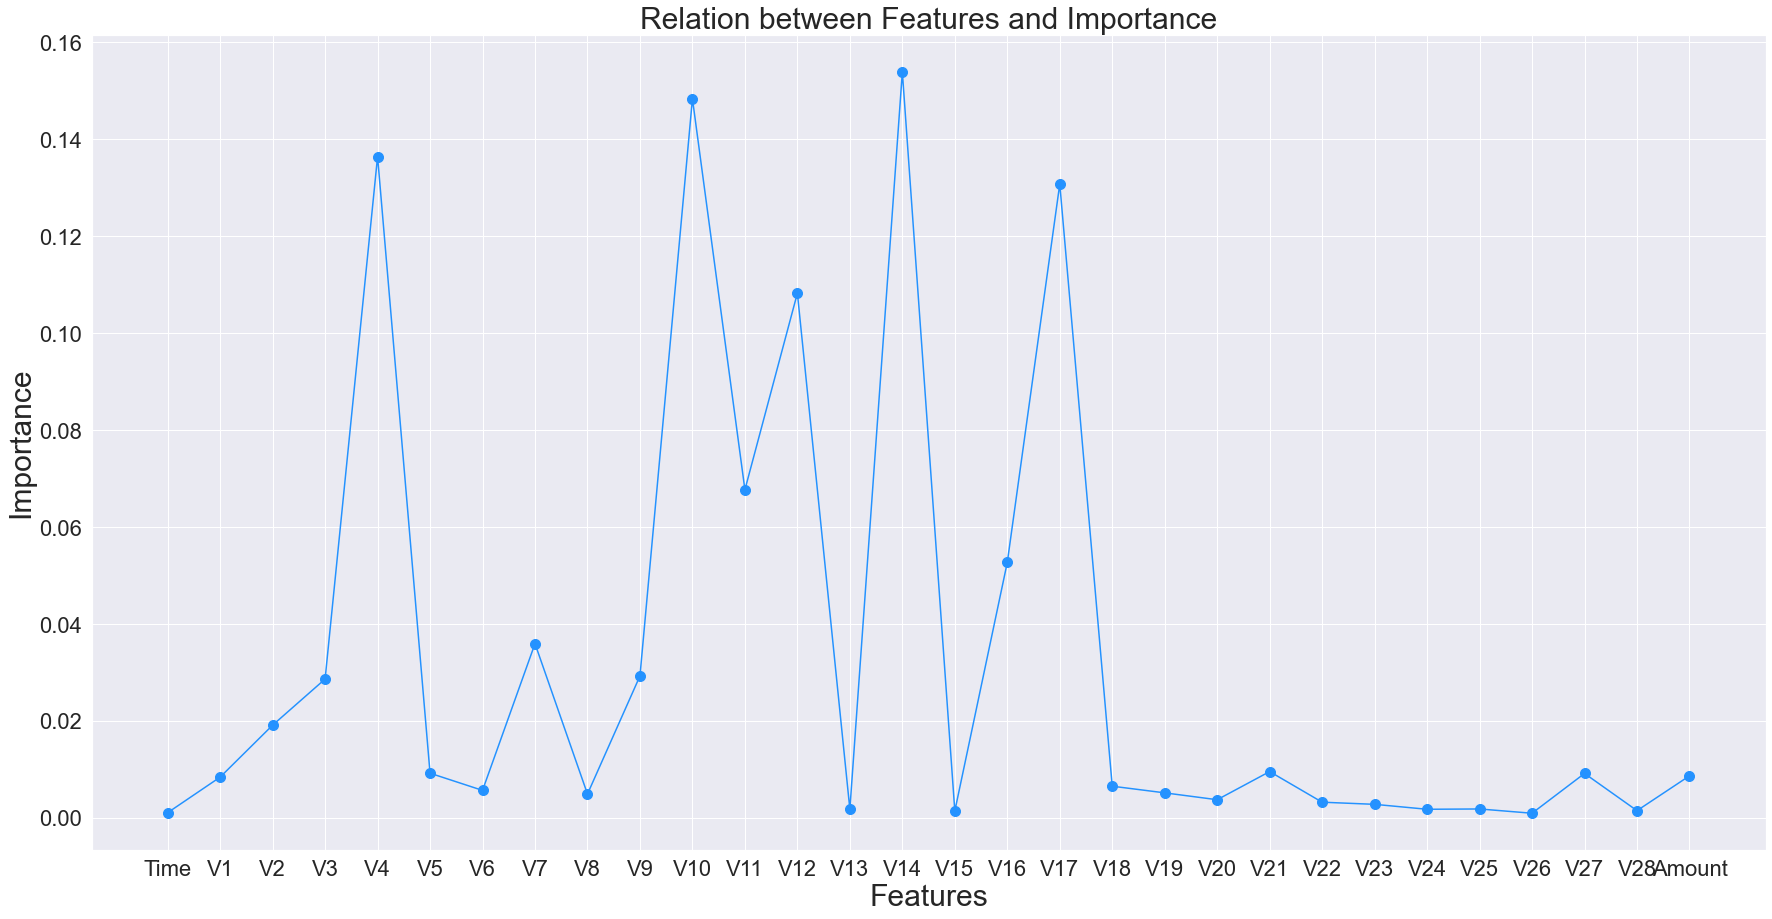

In [52]:
importance = rf.feature_importances_

plt.figure(figsize=(30,15))
plt.ylabel('Importance', fontsize=30), plt.xlabel('Features', fontsize=30)
plt.title("Relation between Features and Importance", fontsize=30)
plt.plot(x.columns, importance, 'o-', color="#2492ff", markersize=10, label="Training score")
plt.show()

**Analysis**:The most 3 Important Features are: "V10", "V14", "V4".